# 信頼区間と検定の関係性

## 信頼区間

平均値の区間推定を行う場合について考える。

母平均を$\mu$、標本平均を$\bar{X}$とすると、

$$
P(-Z_{\alpha/2} \leq \frac{\sqrt{n} (\bar{X} - \mu)}{\sigma} \leq Z_{\alpha/2}) = 1 - \alpha
$$

となり、これを$\mu$について解くと

$$
P(\bar{X} - Z_{\alpha/2} \times \frac{\sigma}{\sqrt{n}}
  \leq \mu \leq 
  \bar{X} + Z_{\alpha/2} \times \frac{\sigma}{\sqrt{n}}) = 1 - \alpha
$$

であり、信頼区間は

$$
[\bar{X} - Z_{\alpha/2} \times \frac{\sigma}{\sqrt{n}},
 \bar{X} + Z_{\alpha/2} \times \frac{\sigma}{\sqrt{n}}]
$$

となる。



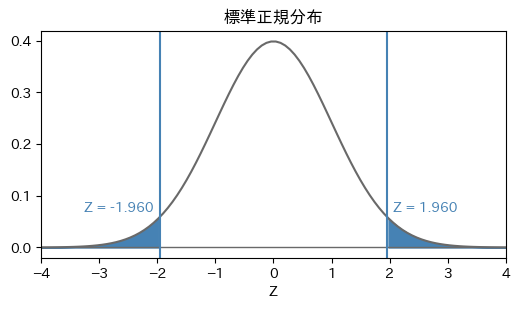

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from scipy.stats import norm

z = np.linspace(-4, 4, 100)
y = norm.pdf(z)

fig, ax = plt.subplots(dpi=100, figsize=[6, 3])
ax.set(title="標準正規分布", xlabel="Z", xlim=(-4, 4))
ax.plot(z, y, color="dimgray")
ax.axhline(y=0, color="dimgray", linewidth=1)

alpha = 0.05 / 2
for a in [alpha, (1 - alpha)]:
    x = norm.ppf(a)
    ax.axvline(x=x, color="steelblue")
    if x < 0:
        ax.text(x - 0.1, norm.pdf(x) + 0.01, f"Z = {x:.2f}", color="steelblue", horizontalalignment="right")
        ax.fill_between(z, 0, y, where = z <= x, color="steelblue")
    else:
        ax.text(x + 0.1, norm.pdf(x) + 0.01, f"Z = {x:.2f}", color="steelblue", horizontalalignment="left")
        ax.fill_between(z, 0, y, where = z >= x, color="steelblue")


## 検定

母平均$\mu$、母分散$\sigma^2$の正規母集団についての

$$
H_0: \mu = \mu_0 \text{ vs } H_1: \mu \neq \mu_0
$$

という検定問題について考える。


帰無仮説が正しければ、標本平均は中心極限定理により正規分布$N(\mu, \sigma^2 / n)$に従うため、標準化した$Z$は標準正規分布$N(0, 1)$に従う。
なので、標準正規分布のパーセント点$Z_{\alpha/2}$と比較して

$$
|Z| > Z_{\alpha/2} \implies H_0\text{を棄却}\\
|Z| \leq Z_{\alpha/2} \implies H_0\text{を受容}\\
$$

となる
